## Exploratorary Data Analysis on titanic dataset

- The train dataset was used for eda it can be downloaded from - https://www.kaggle.com/c/titanic/data?select=train.csv

In [42]:
# Import the Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore',category =FutureWarning)

In [43]:
# Loading the dataset
titanic = pd.read_csv('titanic_train.csv')

In [44]:
# printing the initial rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# Step 1: Checking the missing values of the dataset
titanic.isnull() # checks each and every rows for null values but this is not the best method to check for null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


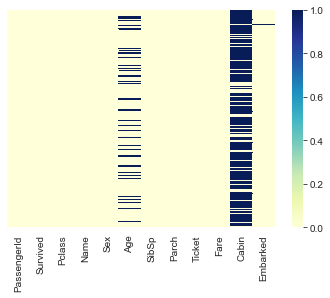

In [47]:
# we can check for null values using seaborn 
sns.heatmap(titanic.isnull(), yticklabels=False,cmap='YlGnBu') #yticklabels as false removes values from y-axis 
plt.show()
# null values can be seen in blue color

In [48]:
titanic.isna().mean().round(2) * 100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [49]:
# Roughly 20% percent of the age data is missing and around 77% of the cabin data is missing and nothing useful
# can be done. we might drop this column or will change it cabin 0 or cabin 1

<AxesSubplot:xlabel='Survived', ylabel='count'>

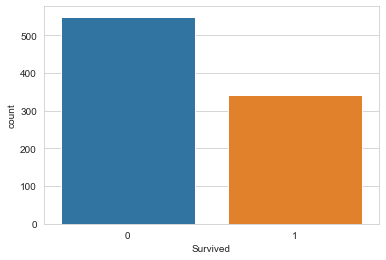

In [50]:
# Getiing the count of the survived passengers
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

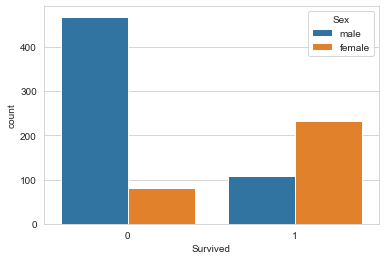

In [51]:
# Getting the survived passengers based on their sex
sns.countplot(x='Survived',data=titanic,hue='Sex')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

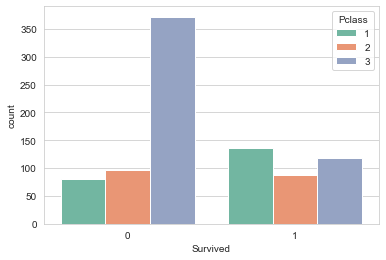

In [52]:
sns.countplot(x='Survived',data=titanic,hue='Pclass',palette='Set2')

<AxesSubplot:xlabel='Age'>

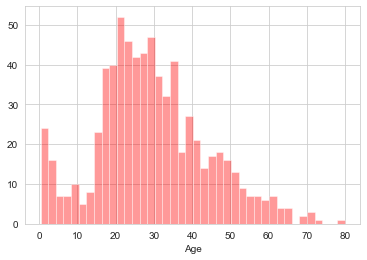

In [53]:
sns.distplot(titanic['Age'].dropna(),color='red',kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

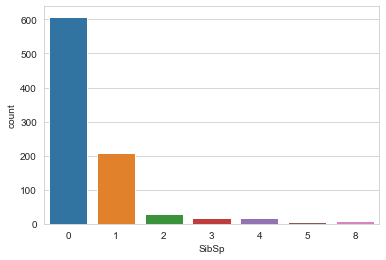

In [54]:
# Counting the sibling and spouse
sns.countplot(x='SibSp',data=titanic)

<AxesSubplot:>

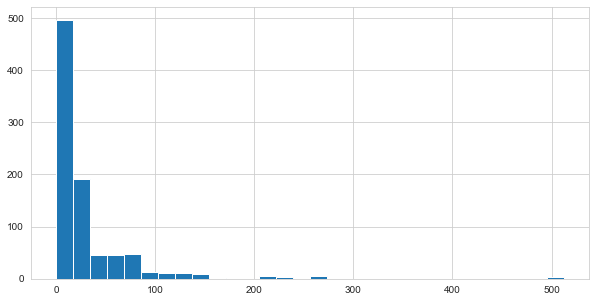

In [55]:
# Checking the average ticket price of the travel
titanic['Fare'].hist(bins=30,figsize=(10,5))

In [56]:
# Checking the correaltion of the variables
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [57]:
# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

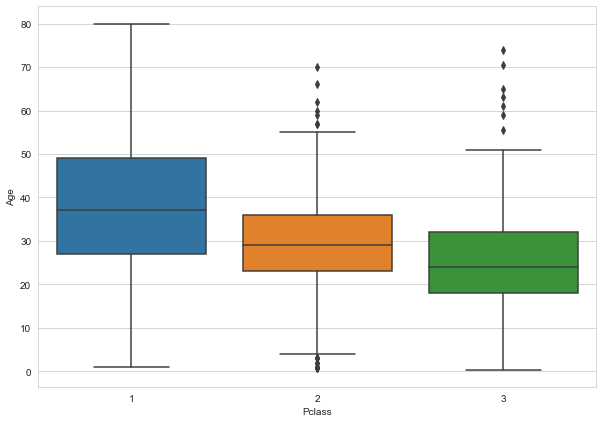

In [58]:
# Replacing the null values in age with the mean of age with respect to their passenger class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [59]:
# Creating the function to replace the Age with mean
def imputing_age(column):
    Age = column[0]
    Pclass= column[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [60]:
titanic['Age'] = titanic[['Age','Pclass']].apply(imputing_age,axis=1)

In [61]:
titanic['Age'].value_counts()

24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
        ... 
36.50      1
70.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:>

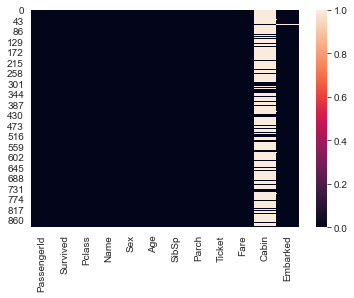

In [62]:
sns.heatmap(titanic.isnull())

In [63]:
# Cabin contains too many missing values and too much feature engineering is required 
# for this exercise we are going to drop the cabin column

In [64]:
titanic.drop('Cabin',axis=1,inplace=True)

In [65]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [66]:
# Now looking at the dataset there are some columns which does not have any significance
# Like passengerid column, name, ticket

In [67]:
# Converting the categorical features

In [68]:
pd.get_dummies(titanic['Embarked'], drop_first=True).head()
# the column has three values P Q S using drop first = True will remove the P column as Q=0 AND S=0 means the value is
# 1 in the P column



,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [70]:
titanic.drop(['Sex','Embarked','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [71]:
# Concatenating the sex and embark columns
titanic = pd.concat([titanic,sex,embark],axis=1)

In [72]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [73]:
# Our model is ready to apply a Logistic Regression Column
independent = titanic.drop('Survived',axis=1) # indepndent variable (X)

In [74]:
independent.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [75]:
dependent = titanic['Survived'] #dependent variable (Y)

In [78]:
dependent.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(independent,dependent,test_size =0.25,random_state=100)

In [81]:
# Training and Predicting

In [83]:
from sklearn.linear_model import LogisticRegression

In [92]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
predictions = log_model.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
accuracy = confusion_matrix(y_test,predictions)

In [89]:
accuracy

array([[111,  16],
       [ 29,  67]], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7982062780269058

In [93]:
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)